In [1]:
# Clustering(군집화)에 필요한 라이브러리를 import 시킨다.
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install scikit-learn
from sklearn.cluster import KMeans
%matplotlib inline

Clustering이란 여러개의 데이터가 있을 때 군집화 하는 것을 의미한다.  
비슷한 데이터끼리 묶으면 관리하기 쉽다는 장점이 있다. 예를 들면 학원을 운영한다 했을 때 고급반, 중급반, 초급반으로 나눠서 적절히 분류해서 관리한다면 활용할 방안이 많을 것이다.  
비지도 학습(Unsupervised Learning) 알고리즘은 정확한 방향성이 일치하지 않더라도 알아서 학습이 가능한 알고리즘으로 데이터를 군집홓는 알고리즘들이 비지도 학습에 속한다. => KMeans 알고리즘이 대표적인 비지도 학습 알고리즘 이다.

Clustering을 실행할 데이터를 만든다.

In [3]:
# DataFrame() : 판다스에서 빈 데이터프레임을 만들 때 사용하는 메소드
# pd.DataFrame(columns=['열이름1', '열이름2', ...])
df = pd.DataFrame(columns=['x', 'y'])
df.loc[0] = [2, 3]
df.loc[1] = [2, 11]
df.loc[2] = [2, 18]
df.loc[3] = [4, 5]
df.loc[4] = [4, 7]
df.loc[5] = [5, 3]
df.loc[6] = [5, 15]
df.loc[7] = [6, 6]
df.loc[8] = [6, 8]
df.loc[9] = [6, 9]
df.loc[10] = [7, 2]
df.loc[11] = [7, 4]
df.loc[12] = [7, 5]
df.loc[13] = [7, 17]
df.loc[14] = [7, 18]
df.loc[15] = [8, 5]
df.loc[16] = [8, 4]
df.loc[17] = [9, 10]
df.loc[18] = [9, 11]
df.loc[19] = [9, 15]
df.loc[20] = [9, 19]
df.loc[21] = [10, 5]
df.loc[22] = [10, 8]
df.loc[23] = [10, 18]
df.loc[24] = [12, 6]
df.loc[25] = [13, 5]
df.loc[26] = [14, 11]
df.loc[27] = [15, 6]
df.loc[28] = [15, 18]
df.loc[29] = [18, 12]
df

x   y
0    2   3
1    2  11
2    2  18
3    4   5
4    4   7
5    5   3
6    5  15
7    6   6
8    6   8
9    6   9
10   7   2
11   7   4
12   7   5
13   7  17
14   7  18
15   8   5
16   8   4
17   9  10
18   9  11
19   9  15
20   9  19
21  10   5
22  10   8
23  10  18
24  12   6
25  13   5
26  14  11
27  15   6
28  15  18
29  18  12

In [18]:
# 판다스의 read_csv() 메소드를 사용해 csv 파일을 읽어들인다.
# 현재 작업중인 소스 파일이 위치한 폴더에 csv 파일이 위치하고 있으면 csv 파일의 이름만 써주면 되지만 다른 폴더에 위치하고 
# 있다면 파일 이름 앞에 파일이 위치한 경로를 지정해야 한다.
# df = pd.read_csv('cluster.csv')           # 소스 파일과 csv 파일이 같은 폴더에 있을 때
df = pd.read_csv('./data/cluster.csv')      # 소스 파일이 위치한 폴더의 한 단계 아래 폴더(data)에 파일이 있을 때
# df = pd.read_csv('./../data/cluster.csv') # 소스 파일이 위치한 폴더의 한 단계 상위 폴더의 아래 폴더(data)에 파일이 있을 때
# head() : 데이터프레임 앞쪽 데이터를 인수로 지정한 개수 만큼 출력한다. 개수를 생략하면 5개가 기본값으로 사용된다.
df.head()

x   y
0  2   3
1  2  11
2  2  18
3  4   5
4  4   7

In [11]:
# tail() : 데이터프레임 뒤쪽 데이터를 인수로 지정한 개수 만큼 출력한다. 개수를 생략하면 5개가 기본값으로 사용된다.
df.tail()

x   y
25  13   5
26  14  11
27  15   6
28  15  18
29  18  12

In [20]:
# index : 데이터프레임의 인덱스를 얻어온다. => 행
print(df.index)
print(list(df.index))

RangeIndex(start=0, stop=30, step=1)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [21]:
# columns : 데이터프레임에서 컬럼 이름을 얻어온다. => 열
print(df.columns)

Index(['x', 'y'], dtype='object')


In [24]:
# values : 데이터프레임에 저장된 데이터만 넘파이 배열 형태로 얻어온다. => 데이터
print(type(df.values))
points = df.values
print(points)

<class 'numpy.ndarray'>
[[ 2  3]
 [ 2 11]
 [ 2 18]
 [ 4  5]
 [ 4  7]
 [ 5  3]
 [ 5 15]
 [ 6  6]
 [ 6  8]
 [ 6  9]
 [ 7  2]
 [ 7  4]
 [ 7  5]
 [ 7 17]
 [ 7 18]
 [ 8  5]
 [ 8  4]
 [ 9 10]
 [ 9 11]
 [ 9 15]
 [ 9 19]
 [10  5]
 [10  8]
 [10 18]
 [12  6]
 [13  5]
 [14 11]
 [15  6]
 [15 18]
 [18 12]]


matplotlib와 seaborn 라이브러리를 사용해 Clustering을 실행할 데이터를 시각화 한다.

In [26]:
import matplotlib as mpl
plt.rcParams['font.size'] = 15                     # 글꼴 크기
plt.rcParams['font.family'] = 'NanumGothicCoding'  # 글꼴 이름
mpl.rcParams['axes.unicode_minus'] = False         # 음수 데이터의 '-'가 깨지지 않게 한다.

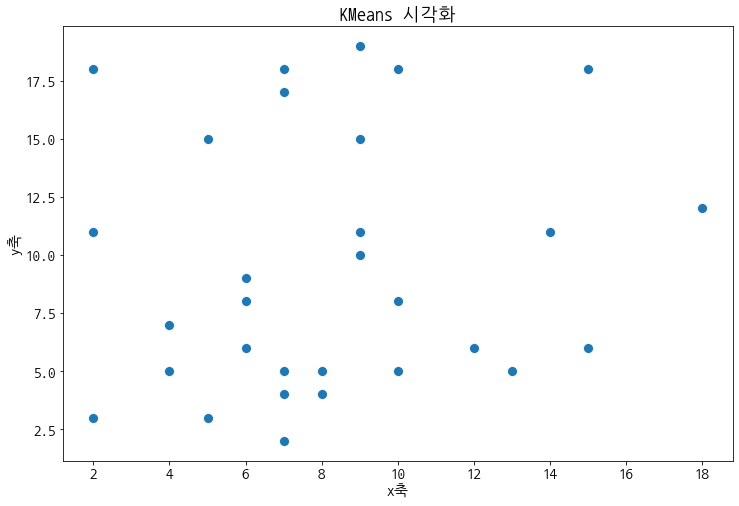

In [30]:
plt.figure(figsize=[12, 8])
sns.scatterplot(data=df, x='x', y='y', s=100)
plt.title('KMeans 시각화')
plt.xlabel('x축')
plt.ylabel('y축')
plt.show()

KMeans를 수행하기 위해서는 클러스터링을 수행할 데이터의 주제를 결정하고 얼마나 많은 클러스터를 만들지 결정한다.  
이 때, 데이터가 정확할 수록 유리하게 클러스터링을 수행할 수 있고 클러스터링을 수행하는 방법은 무작위 중심(Centroid) 값 선택, KMeans++ 법 등 다양한 방법이 있다. 

무작위 중심(Centroid) 값 선택 알고리즘을 이용한 클러스터링  
중심에 가까운 데이터를 클러스터에 포함시키고 중심을 클러스트의 중앙으로 이동시키는 과정을 반복해서 수행하면 되는데 더 이상 중심의 위치가 변하지 않을 때 까지 반복하는 것이 일반적인 방법이고 이러한 과정을 거치면 결과적으로 완벽하게 군집화된 클러스터를 얻을 수 있다.